In [8]:
using Pkg
Pkg.add(["Random", "Distributions", "Plots", "StatsPlots", "Statistics", "LinearAlgebra"])

   Resolving package versions...
  No Changes to `C:\Users\bowus\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\bowus\.julia\environments\v1.10\Manifest.toml`


In [9]:
using Random, Distributions, Plots, StatsPlots, Statistics,LinearAlgebra


In [21]:

function generate_ar(T::Int64)
    y = zeros(T)
    ϵ = zeros(T)
    x = zeros(T, 2)
    ρ = 0.5
    σ = 1
    for t = 1:T
        ϵ[t] = rand(Normal(0,σ))
        if t == 1
            y[t] = ϵ[t]  # Initial value for y when t = 1
            x[t, :] = [1, 0]
        else
            y[t] = ρ * y[t-1] + ϵ[t]
            x[t,:] = [1 y[t-1]]
        end
        
    end
    b_ols = inv(x' * x)* (x' * y)
    return b_ols
end

#Generate the Monte Carlo Simulations
function monte_carlo(T, M)
    b_ols = zeros(M,2)
    for m = 1:M
        b_ols[m,:] = generate_ar(T)
    end
    return rho_ols = b_ols[:,2]
end


monte_carlo (generic function with 1 method)

The mean of the OLS estimator is: 0.49992297194580676


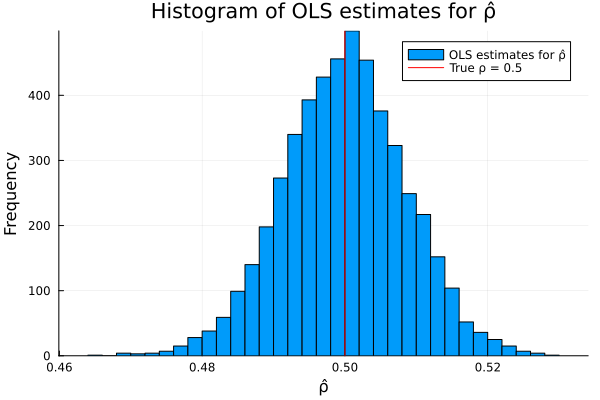

In [22]:
T = 10000
M = 5000
rho_ols_results = monte_carlo(T, M)
ρ = 0.5
println("The mean of the OLS estimator is: ", mean(rho_ols_results))
histogram(rho_ols_results, bins=30, label="OLS estimates for ρ̂", title="Histogram of OLS estimates for ρ̂",
xlabel="ρ̂", ylabel="Frequency", legend=:topright)
vline!([0.5], label="True ρ = $ρ", color=:red)


In [ ]:
function generate_ar(T::Int64)
    y = zeros(T)
    ϵ = zeros(T)
    x = zeros(T, 2)
    ρ = 0.5
    σ = 1
    for t = 1:T
        ϵ[t] = rand(Normal(0,σ))
        if t == 1
            y[t] = ϵ[t]  # Initial value for y when t = 1
            x[t, :] = 0
        else
            y[t] = ρ * y[t-1] + ϵ[t]
            x[t,:] =  y[t-1]
        end
        
    end
    b_ols = inv(x' * x)* (x' * y)
    return b_ols
end

#Generate the Monte Carlo Simulations
function monte_carlo(T, M)
    b_ols = zeros(M,2)
    for m = 1:M
        b_ols[m,:] = generate_ar(T)
    end
    return rho_ols = b_ols[:,2]
end